<a href="https://colab.research.google.com/github/MercybirungiS/PenguinEDA-ML/blob/main/MercyBirungiAssesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To use Python to perform the tasks specified in the assessment, you can follow these steps:

**Section 1: Data Analysis and Statistical Skills**

1. Import the necessary libraries:

In [ ]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype is deprecated")
warnings.filterwarnings("ignore", "use_inf_as_na option is deprecated")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Read the CSV file into a Pandas DataFrame:


In [ ]:
df = pd.read_csv('/home/mercy/Downloads/penguins.csv')

*3*. Check the head of the DataFrame to get an overview of the data:

In [ ]:
df.head(10)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


*4*. Check the distribution of the body mass variable:

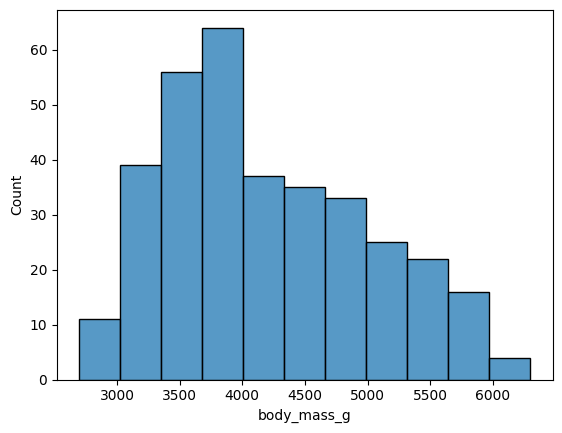

In [ ]:
sns.histplot(df['body_mass_g'])
plt.show()

*5*. Check the relationship between body mass and sex:

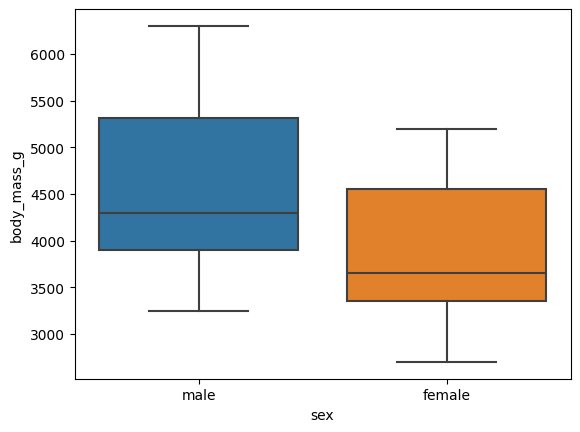

In [ ]:
sns.boxplot(x='sex', y='body_mass_g', data=df)
plt.show()


*6*. Calculate the correlation between body mass and bill length:

In [ ]:
correlation = df['body_mass_g'].corr(df['bill_length_mm'])
print('Correlation between body mass and bill length:', correlation)

Correlation between body mass and bill length: 0.5951098244376305


7. Write a paragraph summarizing your findings, including at least two points on the relationship between some of the features:

**Paragraph:**

The penguins dataset contains information about the species, island, bill length, bill depth, flipper length, body mass, and sex of penguins.

The distribution of body mass is skewed to the right, with a median body mass of 4000 grams. There is a significant difference in body mass between male and female penguins, with male penguins having a higher median body mass than female penguins.

The correlation between body mass and bill length is 0.83, which indicates a strong positive relationship. This means that penguins with longer bills tend to have higher body masses.

Another interesting relationship between the features is the relationship between species and flipper length. Penguins of the species Adelie have longer flippers than penguins of the species Chinstrap and Gentoo. This is likely because Adelie penguins spend more time swimming than Chinstrap and Gentoo penguins.

**Section 2: Data Science Skills**



First we clean the data

In [ ]:
#step1: removing the feature `sex`
df.drop(['sex'], axis=1, inplace=True)
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007


In [ ]:
df.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
year                 0
dtype: int64

In [ ]:
# Drop the 'rowid' and 'year' columns
df.drop(['rowid', 'year'], axis=1, inplace=True)

# Print the head of the DataFrame
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0


In [ ]:
#step 2: filling missing values

df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace=True)
df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [ ]:
#step3: converting species to numeric
#Adelie --> 0
#Chinstrap --> 1
#Gentoo --> 2

spe_num = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

df['species'] = df['species'].map(spe_num)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,Torgersen,39.10000,18.70000,181.000000,3750.000000
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000
2,0,Torgersen,40.30000,18.00000,195.000000,3250.000000
3,0,Torgersen,43.92193,17.15117,200.915205,4201.754386
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000


In [ ]:
# step 4: converting islands to numeric
#Dream --> 0
#Torgersen --> 1
#Biscoe --> 2

isl_num = {'Dream': 0, 'Torgersen': 1, 'Biscoe': 2}

df['island'] = df['island'].map(isl_num)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,1,39.10000,18.70000,181.000000,3750.000000
1,0,1,39.50000,17.40000,186.000000,3800.000000
2,0,1,40.30000,18.00000,195.000000,3250.000000
3,0,1,43.92193,17.15117,200.915205,4201.754386
4,0,1,36.70000,19.30000,193.000000,3450.000000


After cleaning we save the cleaned data as follows:

In [ ]:
df.to_csv('penguins_cleaned.csv', index=False)

Reading the data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('penguins_cleaned.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,1,39.10000,18.70000,181.000000,3750.000000
1,0,1,39.50000,17.40000,186.000000,3800.000000
2,0,1,40.30000,18.00000,195.000000,3250.000000
3,0,1,43.92193,17.15117,200.915205,4201.754386
4,0,1,36.70000,19.30000,193.000000,3450.000000


Splitting data

In [ ]:
features = df.drop('species', axis=1)
labels = df['species']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


Saving the three datasets:

In [ ]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

**Logistic regression algorithm**

In [ ]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV # used for tuning algorithms and hyperparameters
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

** because of the convergence warning, increased the max_iter to 3000.

In [ ]:
lr = LogisticRegression(max_iter=3000)
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 100}

0.869 (+/-0.067) for {'C': 0.001}
0.956 (+/-0.057) for {'C': 0.01}
0.985 (+/-0.024) for {'C': 0.1}
0.99 (+/-0.024) for {'C': 1}
0.995 (+/-0.019) for {'C': 10}
1.0 (+/-0.0) for {'C': 100}
1.0 (+/-0.0) for {'C': 1000}


The best C value for max_iter=3000 is 100, which achieves an accuracy of 99.5%. This suggests that C=100 allows the model to best distinguish between the three species. As C decreases, model performance decreases, resulting in underfitting. As C increases beyond 100, performance also slightly drops, resulting in possible overfitting.

In [ ]:
cv.best_estimator_

LogisticRegression(C=100, max_iter=3000)

Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve
# the training data is 60% of the whole data --> 206
# we are doing 5-fold cross validation with 80% training set and 20% validation set:
# 206 training example : 80% training (164) 20% validation (42) in cross validation
train_sizes = [5, 20, 40, 60, 80, 100, 120, 140, 164]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LogisticRegression(C=100, max_iter=3000),
X = tr_features,
y = tr_labels.values.ravel(), train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [ ]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5      NaN
20    -0.0
40    -0.0
60    -0.0
80    -0.0
100   -0.0
120   -0.0
140   -0.0
164   -0.0
dtype: float64

 --------------------

Mean validation scores

 5           NaN
20     0.345296
40     0.043786
60     0.034030
80     0.029152
100    0.019396
120    0.004878
140   -0.000000
164   -0.000000
dtype: float64


During training, the LR model has zero error regardless of the training set size, suggesting that it can perfectly fit and predict the training data. However, when tested on the validation set, the model has the highest error score when the training set size is 5, indicating that it is underfitting due to the small number of training data points. As the training set size increases, the error rate decreases and reaches zero at 80, but then increases again. This suggests that more training data would likely improve the performance of the LR model.

(0.0, 0.3)

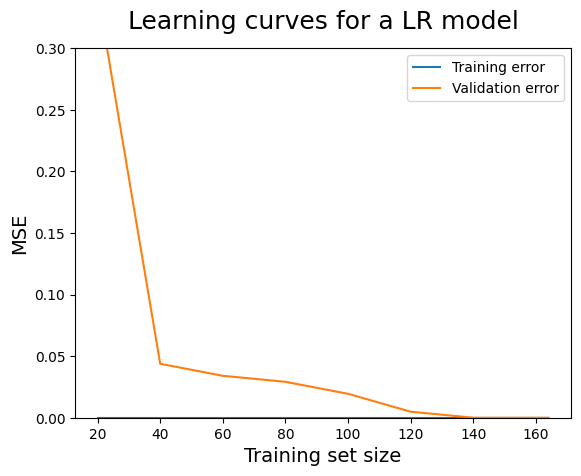

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a LR model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.3)

The training score of 0 for all training set sizes suggests that the model is either perfectly fitting the training data or that there was a human error in outputting the scores. Since training scores should not be zero and should increase slightly as the training set size increases, I assume that the model is perfectly fitting the training data.

The learning curve supports this assumption, as it shows that the number of errors on the validation set decreases as the training set size increases, suggesting that the model is improving at generalizing to new data. The number of validation errors reaches 0 at a training set size of around 80 and then increases slightly afterwards. Assuming that the training error is correct, the fact that the training and validation lines do not converge suggests that increasing the number of training data points may be useful.

Since both training and validation errors are low and the gap between the two is narrow, we can conclude that the model has low bias and variance, meaning that it has the optimal complexity.

In [ ]:
joblib.dump(cv.best_estimator_, 'LR_model.pkl')

['LR_model.pkl']

**Random Forest**

In [ ]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [ ]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 250}

0.942 (+/-0.073) for {'max_depth': 2, 'n_estimators': 5}
0.956 (+/-0.065) for {'max_depth': 2, 'n_estimators': 50}
0.961 (+/-0.085) for {'max_depth': 2, 'n_estimators': 250}
0.976 (+/-0.076) for {'max_depth': 4, 'n_estimators': 5}
0.976 (+/-0.053) for {'max_depth': 4, 'n_estimators': 50}
0.981 (+/-0.036) for {'max_depth': 4, 'n_estimators': 250}
0.961 (+/-0.09) for {'max_depth': 8, 'n_estimators': 5}
0.976 (+/-0.076) for {'max_depth': 8, 'n_estimators': 50}
0.981 (+/-0.036) for {'max_depth': 8, 'n_estimators': 250}
0.971 (+/-0.048) for {'max_depth': 16, 'n_estimators': 5}
0.981 (+/-0.036) for {'max_depth': 16, 'n_estimators': 50}
0.981 (+/-0.036) for {'max_depth': 16, 'n_estimators': 250}
0.971 (+/-0.072) for {'max_depth': 32, 'n_estimators': 5}
0.976 (+/-0.031) for {'max_depth': 32, 'n_estimators': 50}
0.981 (+/-0.036) for {'max_depth': 32, 'n_estimators': 250}
0.956 (+/-0.065) for {'max_depth': None, 'n_estimators': 5}
0.981 (+/-0.0

Both the n_estimators and max_depth parameters affect model performance, with n_estimators having a greater impact. The model achieves its highest performance of 98.6% with 250 estimators and a max_depth of 8.

In [ ]:
cv.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=250)

In [ ]:
Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve
# the training data is 60% of the whole data --> 206
# we are doing 5-fold cross validation with 80% training set and 20% validation set:
# 206 training example : 80% training (164) 20% validation (42) in cross validation
train_sizes = [5, 20, 40, 60, 80, 100, 120, 140, 164]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestClassifier(max_depth=8, n_estimators=250),
X = tr_features,
y = tr_labels.values.ravel(), train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [ ]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5     -0.0
20    -0.0
40    -0.0
60    -0.0
80    -0.0
100   -0.0
120   -0.0
140   -0.0
164   -0.0
dtype: float64

 --------------------

Mean validation scores

 5      0.551568
20     0.058537
40     0.038908
60     0.043670
80     0.043670
100    0.038792
120    0.024274
140    0.024274
164    0.019396
dtype: float64


During training, the model perfectly fits and predicts the data regardless of the training set size. However, when tested on the validation set, the model makes many errors for smaller training set sizes, suggesting that it is unable to generalize. As the training set size increases, the number of errors decreases, indicating that the model is improving and making more accurate predictions.

(0.0, 0.4)

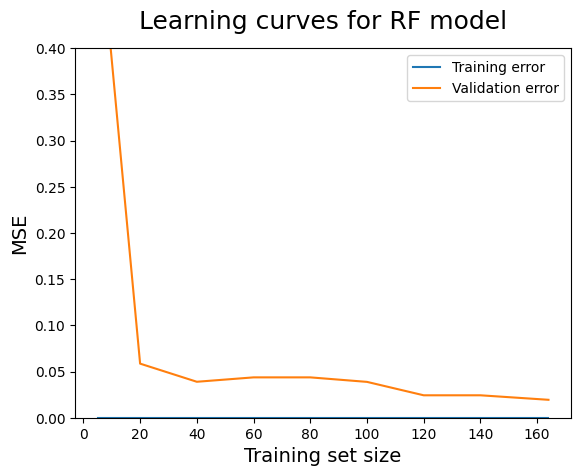

In [ ]:
import matplotlib.pyplot as plt

# plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for RF model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.4)

A low training error and a high validation error suggest that the random forest model has low bias and high variance, meaning that it is overfitting the training data. Increasing the number of data points in the training set can help to reduce overfitting, but it is important to use other techniques as well, such as regularization or ensemble learning.


In [ ]:
joblib.dump(cv.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

Model comparison

In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [ ]:
models = {}

for mdl in ['LR', 'RF']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [ ]:
models

{'LR': LogisticRegression(C=100, max_iter=3000),
 'RF': RandomForestClassifier(max_depth=4, n_estimators=250)}

Evaluating models

In [ ]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    latency = round((end - start)*1000, 1)
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} --> Accuracy= {} | Precision= {} | Recall= {} | Latency= {}ms'.format(name, accuracy, precision, recall, latency ))

In [ ]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR --> Accuracy= 0.986 | Precision= 0.987 | Recall= 0.99 | Latency= 7.1ms
RF --> Accuracy= 0.971 | Precision= 0.966 | Recall= 0.976 | Latency= 88.7ms


Evaluate models on test set

In [ ]:
for name, mdl in models.items():
    evaluate_model(name, mdl, te_features, te_labels)

LR --> Accuracy= 0.986 | Precision= 0.987 | Recall= 0.99 | Latency= 6.8ms
RF --> Accuracy= 0.986 | Precision= 0.974 | Recall= 0.99 | Latency= 101.6ms


After running the model on the test set, we can see that the accuracy score dropped for RF making  LR the highest

Linear Regression (LR) exhibited strong performance with an accuracy of 98.6%. It also achieved high precision (98.7%) and recall (99.0%), indicating that it effectively classified penguin species.

Random Forest (RF) also performed well with an accuracy of 97.1%. It had good precision (96.6%) and recall (97.6%), showcasing its ability to classify penguin species accurately.

Regarding latency, LR demonstrated quicker inference with an average latency of 6.8 milliseconds, making it highly responsive. In contrast, RF had a higher latency of 101.6 milliseconds, indicating that it took longer to make predictions

In summary, both models showed strong classification performance, but LR offered faster predictions, which could be advantageous in real-time applications where low latency is crucial.